In [1]:
from n_mirror_cavity_classes_ter import Mirror, Subcavity, Cavity_sym, Cavity_num
from sympy import Symbol, symbols, Derivative
import sympy as sp
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np
sp.init_printing(use_unicode=True)
sp.init_session(quiet=True)
from scipy.signal import find_peaks
%matplotlib inline
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import matplotlib.ticker as ticker
from matplotlib.colors import LinearSegmentedColormap

In [2]:
t1, t2, t3 = symbols("t1 t2 t3")

L, delta, omega, L1, L2, delta1, delta2 = symbols("L delta omega L1 L2 delta1 delta2")
subs_dict = [{L: L1, delta: delta1}, {L: L2, delta: delta2}]
mirror_ts = [t1, t2, t3]
lambdify_vars = [omega]

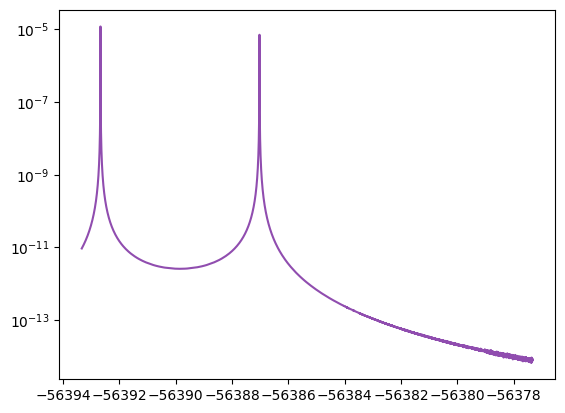

In [203]:
t1, t2, t3 = symbols("t1 t2 t3")

L, delta, omega, L1, L2, delta1, delta2 = symbols("L delta omega L1 L2 delta1 delta2")
subs_dict = [{L: L1, delta: delta1}, {L: L2, delta: delta2}]
mirror_ts = [t1, t2, t3]
lambdify_vars = [omega]
nu_range = np.linspace(-8e6, 8e6, 10000)
subs_dict_num = {L1: 1, delta1: 200e-6, L2: 1, delta2: 0}
cavity = Cavity_num(mirror_ts, mirror_vals, subs_dict, subs_dict_num, lambdify_vars)
ranges, values, res_1, res_2 = cavity.transmitted_power([nu_range])
plt.plot(ranges / (2 * np.pi) * 1e-6, np.abs(values), color=colors[idx])
plt.yscale("log")

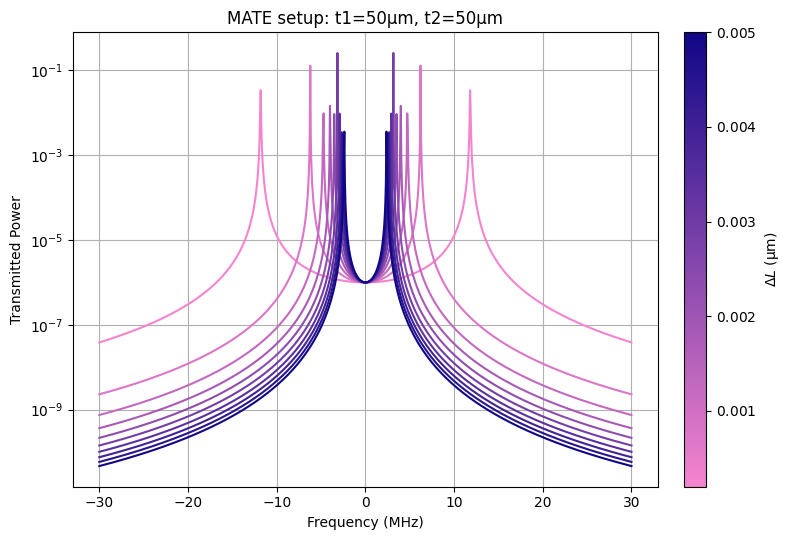

In [205]:
custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", ["#f584cf", "#100787"])

# Mirror values – keeping only the first case
mirror_vals = {t1: 50e-6, t2: 50e-6, t3: 1e-6}

# Parameter sweep
dL = np.linspace(200e-6, 5000e-6, 10)
nu_range = np.linspace(-30e6, 30e6, 1000)

# Set up plot
fig, ax = plt.subplots(figsize=(8, 5.5))
norm = mcolors.Normalize(vmin=dL.min(), vmax=dL.max())
sm = cm.ScalarMappable(cmap=custom_cmap, norm=norm)
sm.set_array([])

colors = custom_cmap(np.linspace(0, 1, len(dL)))
for idx, d in enumerate(dL):
    subs_dict_num = {L1: 1-d, delta1: 0, L2: d, delta2: 0}
    cavity = Cavity_num(mirror_ts, mirror_vals, subs_dict, subs_dict_num, lambdify_vars)
    ranges, values, res_1, res_2 = cavity.transmitted_power([nu_range])

    ax.plot(ranges / (2 * np.pi) * 1e-6, np.abs(values), color=colors[idx])

ax.set_yscale("log")
ax.set_xlabel("Frequency (MHz)")
ax.set_ylabel("Transmitted Power")
ax.set_title("MATE setup: t1=50μm, t2=50μm")

# Colorbar
cbar = fig.colorbar(sm, ax=ax, orientation="vertical", fraction=0.046, pad=0.04)
cbar.ax.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
cbar.set_label(r"$\Delta L$ (μm)")

plt.tight_layout()
plt.grid()
plt.savefig("transmission_MAME_dl.svg", transparent=True, dpi=300)
plt.show()

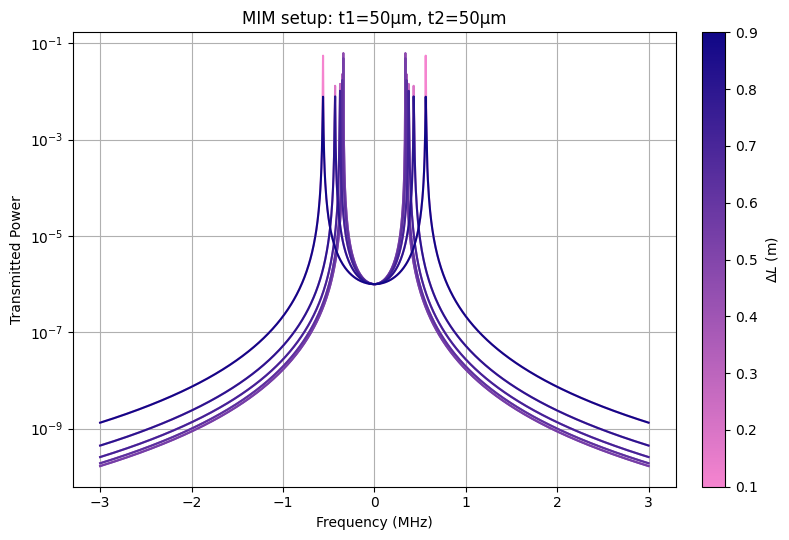

In [206]:
custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", ["#f584cf", "#100787"])

# Mirror values – keeping only the first case
mirror_vals = {t1: 50e-6, t2: 50e-6, t3: 1e-6}

# Parameter sweep
dL = np.linspace(0.1, 0.9, 10)
nu_range = np.linspace(-3e6, 3e6, 1000)

# Set up plot
fig, ax = plt.subplots(figsize=(8, 5.5))
norm = mcolors.Normalize(vmin=dL.min(), vmax=dL.max())
sm = cm.ScalarMappable(cmap=custom_cmap, norm=norm)
sm.set_array([])

colors = custom_cmap(np.linspace(0, 1, len(dL)))
for idx, d in enumerate(dL):
    subs_dict_num = {L1: 1-d, delta1: 0, L2: d, delta2: 0}
    cavity = Cavity_num(mirror_ts, mirror_vals, subs_dict, subs_dict_num, lambdify_vars)
    ranges, values, res_1, res_2 = cavity.transmitted_power([nu_range])

    ax.plot(ranges / (2 * np.pi) * 1e-6, np.abs(values), color=colors[idx])

ax.set_yscale("log")
ax.set_xlabel("Frequency (MHz)")
ax.set_ylabel("Transmitted Power")
ax.set_title("MIM setup: t1=50μm, t2=50μm")

# Colorbar
cbar = fig.colorbar(sm, ax=ax, orientation="vertical", fraction=0.046, pad=0.04)
cbar.ax.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
cbar.set_label(r"$\Delta L$ (m)")

plt.tight_layout()
plt.grid()
plt.savefig("transmission_MIM_dl.svg", transparent=True, dpi=300)
plt.show()

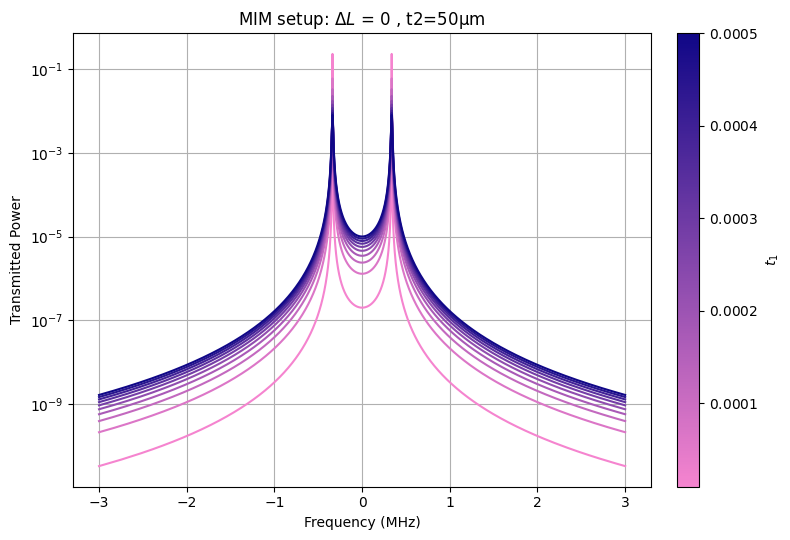

In [207]:
custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", ["#f584cf", "#100787"])

# Mirror values – keeping only the first case

# Parameter sweep
d = 0.5
t1s = np.linspace(10e-6, 500e-6, 10)
nu_range = np.linspace(-3e6, 3e6, 10000)

# Set up plot
fig, ax = plt.subplots(figsize=(8, 5.5))
norm = mcolors.Normalize(vmin=t1s.min(), vmax=t1s.max())
sm = cm.ScalarMappable(cmap=custom_cmap, norm=norm)
sm.set_array([])

colors = custom_cmap(np.linspace(0, 1, len(t1s)))
for idx, t1_1 in enumerate(t1s):
    subs_dict_num = {L1: 1-d, delta1: 0, L2: d, delta2: 0}
    mirror_vals = {t1: t1_1, t2: 50e-6, t3: 1e-6}
    cavity = Cavity_num(mirror_ts, mirror_vals, subs_dict, subs_dict_num, lambdify_vars)
    ranges, values, res_1, res_2 = cavity.transmitted_power([nu_range])

    ax.plot(ranges / (2 * np.pi) * 1e-6, np.abs(values), color=colors[idx])

ax.set_yscale("log")
ax.set_xlabel("Frequency (MHz)")
ax.set_ylabel("Transmitted Power")
ax.set_title(r"MIM setup: $\Delta L$ = 0 , t2=50μm")

# Colorbar
cbar = fig.colorbar(sm, ax=ax, orientation="vertical", fraction=0.046, pad=0.04)
cbar.ax.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
cbar.set_label(r"$t_1$")

plt.tight_layout()
plt.grid()
plt.savefig("transmission_MIM_t1.svg", transparent=True, dpi=300)
plt.show()

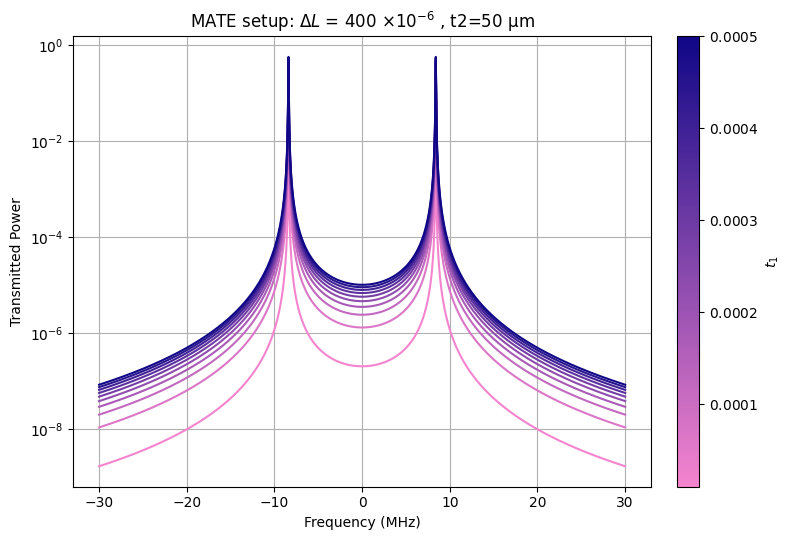

In [208]:
custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", ["#f584cf", "#100787"])

# Mirror values – keeping only the first case

# Parameter sweep
dL = 400e-6
t1s = np.linspace(10e-6, 500e-6, 10)
nu_range = np.linspace(-30e6, 30e6, 10000)

# Set up plot
fig, ax = plt.subplots(figsize=(8, 5.5))
norm = mcolors.Normalize(vmin=t1s.min(), vmax=t1s.max())
sm = cm.ScalarMappable(cmap=custom_cmap, norm=norm)
sm.set_array([])

colors = custom_cmap(np.linspace(0, 1, len(t1s)))
for idx, t1_1 in enumerate(t1s):
    subs_dict_num = {L1: 1-400e-6, delta1: 0, L2: 400e-6, delta2: 0}
    mirror_vals = {t1: t1_1, t2: 50e-6, t3: 1e-6}
    cavity = Cavity_num(mirror_ts, mirror_vals, subs_dict, subs_dict_num, lambdify_vars)
    ranges, values, res_1, res_2 = cavity.transmitted_power([nu_range])

    ax.plot(ranges / (2 * np.pi) * 1e-6, np.abs(values), color=colors[idx])

ax.set_yscale("log")
ax.set_xlabel("Frequency (MHz)")
ax.set_ylabel("Transmitted Power")
ax.set_title(r"MATE setup: $\Delta L$ = 400 $\times 10^{-6}$ , t2=50 μm")

# Colorbar
cbar = fig.colorbar(sm, ax=ax, orientation="vertical", fraction=0.046, pad=0.04)
cbar.ax.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
cbar.set_label(r"$t_1$")

plt.tight_layout()
plt.grid()
plt.savefig("transmission_MATE_t1.svg", transparent=True, dpi=300)
plt.show()

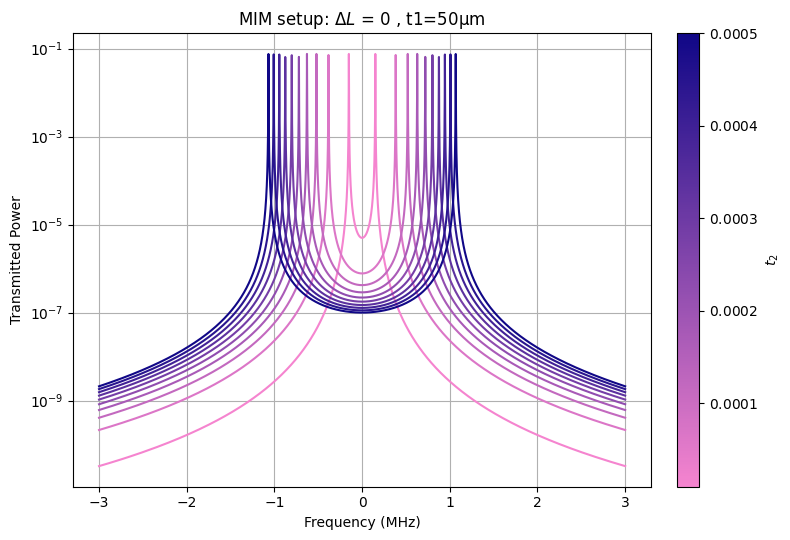

In [209]:
custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", ["#f584cf", "#100787"])

# Mirror values – keeping only the first case

# Parameter sweep
d = 0.5
t1s = np.linspace(10e-6, 500e-6, 10)
nu_range = np.linspace(-3e6, 3e6, 10000)

# Set up plot
fig, ax = plt.subplots(figsize=(8, 5.5))
norm = mcolors.Normalize(vmin=t1s.min(), vmax=t1s.max())
sm = cm.ScalarMappable(cmap=custom_cmap, norm=norm)
sm.set_array([])

colors = custom_cmap(np.linspace(0, 1, len(t1s)))
for idx, t1_1 in enumerate(t1s):
    subs_dict_num = {L1: 1-d, delta1: 0, L2: d, delta2: 0}
    mirror_vals = {t1: 50e-6, t2: t1_1, t3: 1e-6}
    cavity = Cavity_num(mirror_ts, mirror_vals, subs_dict, subs_dict_num, lambdify_vars)
    ranges, values, res_1, res_2 = cavity.transmitted_power([nu_range])

    ax.plot(ranges / (2 * np.pi) * 1e-6, np.abs(values), color=colors[idx])

ax.set_yscale("log")
ax.set_xlabel("Frequency (MHz)")
ax.set_ylabel("Transmitted Power")
ax.set_title(r"MIM setup: $\Delta L$ = 0 , t1=50μm")

# Colorbar
cbar = fig.colorbar(sm, ax=ax, orientation="vertical", fraction=0.046, pad=0.04)
cbar.ax.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
cbar.set_label(r"$t_2$")

plt.tight_layout()
plt.grid()
plt.savefig("transmission_MIM_t2.svg", transparent=True, dpi=300)
plt.show()

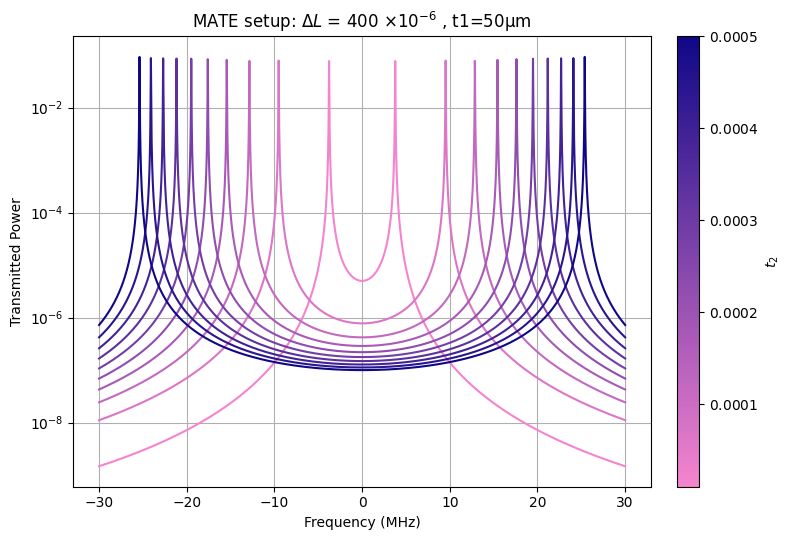

In [210]:
custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", ["#f584cf", "#100787"])

# Mirror values – keeping only the first case

# Parameter sweep
d = 400e-6
t1s = np.linspace(10e-6, 500e-6, 10)
nu_range = np.linspace(-30e6, 30e6, 10000)

# Set up plot
fig, ax = plt.subplots(figsize=(8, 5.5))
norm = mcolors.Normalize(vmin=t1s.min(), vmax=t1s.max())
sm = cm.ScalarMappable(cmap=custom_cmap, norm=norm)
sm.set_array([])

colors = custom_cmap(np.linspace(0, 1, len(t1s)))
for idx, t1_1 in enumerate(t1s):
    subs_dict_num = {L1: 1-d, delta1: 0, L2: d, delta2: 0}
    mirror_vals = {t1: 50e-6, t2: t1_1, t3: 1e-6}
    cavity = Cavity_num(mirror_ts, mirror_vals, subs_dict, subs_dict_num, lambdify_vars)
    ranges, values, res_1, res_2 = cavity.transmitted_power([nu_range])

    ax.plot(ranges / (2 * np.pi) * 1e-6, np.abs(values), color=colors[idx])

ax.set_yscale("log")
ax.set_xlabel("Frequency (MHz)")
ax.set_ylabel("Transmitted Power")
ax.set_title(r"MATE setup: $\Delta L$ = 400 $\times 10^{-6}$ , t1=50μm")

# Colorbar
cbar = fig.colorbar(sm, ax=ax, orientation="vertical", fraction=0.046, pad=0.04)
cbar.ax.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
cbar.set_label(r"$t_2$")

plt.tight_layout()
plt.grid()
plt.savefig("transmission_MATE_t2.svg", transparent=True, dpi=300)
plt.show()

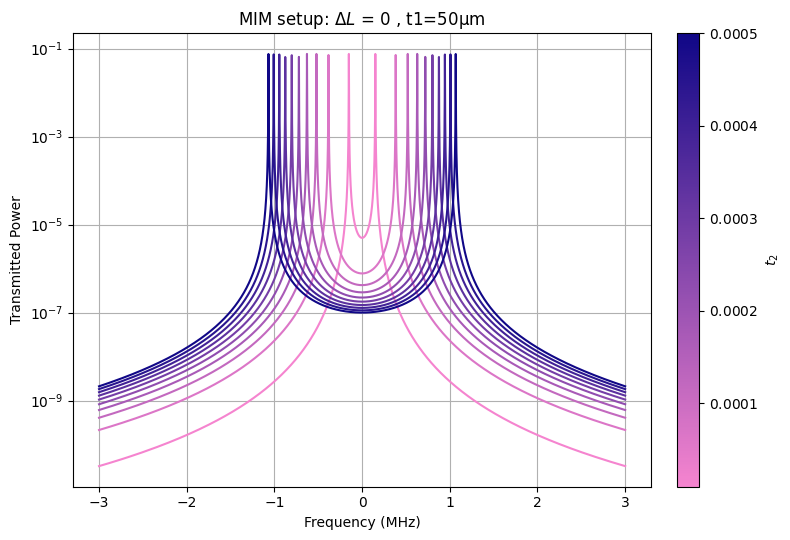

In [212]:
custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", ["#f584cf", "#100787"])

# Mirror values – keeping only the first case

# Parameter sweep
d = 0.5
t1s = np.linspace(10e-6, 500e-6, 10)
nu_range = np.linspace(-3e6, 3e6, 10000)

# Set up plot
fig, ax = plt.subplots(figsize=(8, 5.5))
norm = mcolors.Normalize(vmin=t1s.min(), vmax=t1s.max())
sm = cm.ScalarMappable(cmap=custom_cmap, norm=norm)
sm.set_array([])

colors = custom_cmap(np.linspace(0, 1, len(t1s)))
for idx, t1_1 in enumerate(t1s):
    subs_dict_num = {L1: 1-d, delta1: 0, L2: d, delta2: 0}
    mirror_vals = {t1: 50e-6, t2: t1_1, t3: 1e-6}
    cavity = Cavity_num(mirror_ts, mirror_vals, subs_dict, subs_dict_num, lambdify_vars)
    ranges, values, res_1, res_2 = cavity.transmitted_power([nu_range])

    ax.plot(ranges / (2 * np.pi) * 1e-6, np.abs(values), color=colors[idx])

ax.set_yscale("log")
ax.set_xlabel("Frequency (MHz)")
ax.set_ylabel("Transmitted Power")
ax.set_title(r"MIM setup: $\Delta L$ = 0 , t1=50μm")

# Colorbar
cbar = fig.colorbar(sm, ax=ax, orientation="vertical", fraction=0.046, pad=0.04)
cbar.ax.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
cbar.set_label(r"$t_2$")

plt.tight_layout()
plt.grid()
plt.savefig("transmission_MIM_t2.svg", transparent=True, dpi=300)
plt.show()

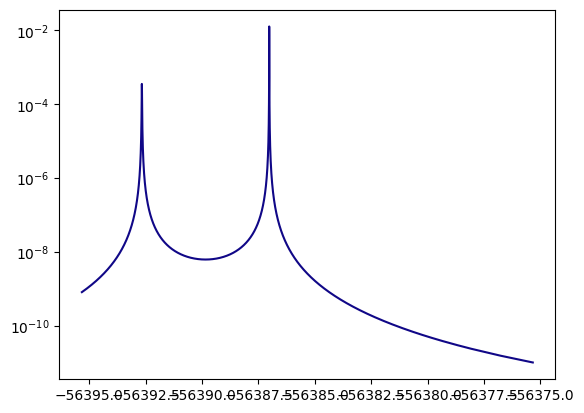

In [ ]:
nu_range = np.linspace(-10e6, 10e6, 10000)
subs_dict_num = {L1: 1, delta1: 200e-6, L2: 1, delta2: 0}
cavity = Cavity_num(mirror_ts, mirror_vals, subs_dict, subs_dict_num, lambdify_vars)
ranges, values, res_1, res_2 = cavity.transmitted_power([nu_range])
plt.plot(ranges / (2 * np.pi) * 1e-6, np.abs(values), color=colors[idx])
plt.yscale("log")

In [178]:
t1, t2, t3 = symbols("t1 t2 t3")

L, delta, omega, L1, L2, delta1, delta2 = symbols("L delta omega L1 L2 delta1 delta2")

dL = 0.5
subs_dict = [{L: L1, delta: delta1}, {L: L2, delta: delta2}]
subs_dict_num = {L1: 1-dL, delta1:50e-9, L2:dL, delta2: 0}
mirror_ts = [t1, t2, t3]
lambdify_vars = [omega]
# mirror_vals = {t1: 0.1, t2: 0.1, t3: 0.1}
mirror_vals = {t1: 50e-6, t2: 10e-6, t3: 1e-6}
# 10 ppm
cavity_sym = Cavity_sym(mirror_ts, subs_dict)

cavity = Cavity_num(mirror_ts, mirror_vals, subs_dict, subs_dict_num, lambdify_vars)

-114326097.51284747 -114326474.50434288


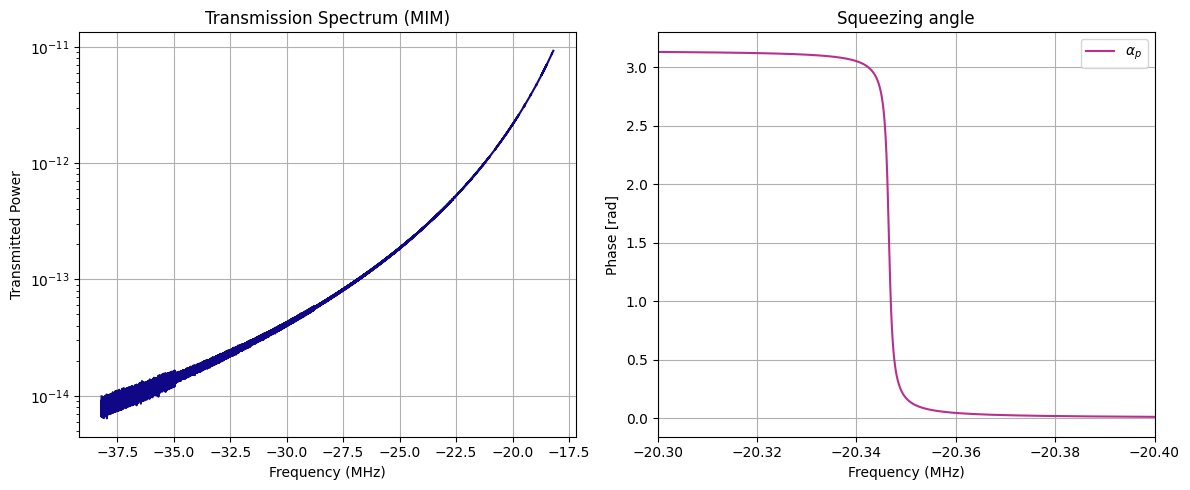

In [183]:
nu_range = np.linspace(-10e6, 10e6, 1000000) # 10k originally
detuning = -2e6  # Detuning value

# Compute transmission power spectrum
ranges, values, res_1, res_2 = cavity.transmitted_power([nu_range])
print(res_1, res_2)

# Compute folded spectrum
ranges_folded, values_folded = cavity.folded_spectrum_reflected([nu_range], detuning)

# Create subplots: Transmission power (left) and Folded spectrum (right)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].plot(ranges / (2*np.pi) * 1e-6, values, c =  "#100787")
axes[0].set_yscale("log")
axes[0].set_xlabel("Frequency (MHz)")
axes[0].set_ylabel("Transmitted Power")
axes[0].set_title("Transmission Spectrum (MIM)")
axes[0].grid()

axes[1].plot(ranges_folded / (2*np.pi) * 1e-6, values_folded, c="#b7308a", label=r"$\alpha_p$")
axes[1].set_xlabel("Frequency (MHz)")
axes[1].set_ylabel("Phase [rad]")
axes[1].set_title("Squeezing angle")
axes[1].legend()
axes[1].grid()
axes[1].set_xlim(-20.3, -20.4)  


# Adjust layout and show
plt.tight_layout()
plt.show()

In [3]:
t1, t2, t3 = symbols("t1 t2 t3")

L, delta, omega, L1, L2, delta1, delta2 = symbols("L delta omega L1 L2 delta1 delta2")

dL = 0.5
subs_dict = [{L: L1, delta: delta1}, {L: L2, delta: delta2}]
subs_dict_num = {L1: 1-dL, delta1: 0, L2:dL, delta2: 0}
mirror_ts = [t1, t2, t3]
lambdify_vars = [omega]
# mirror_vals = {t1: 0.1, t2: 0.1, t3: 0.1}
mirror_vals = {t1: 50e-6, t2: 10e-6, t3: 1e-6}
# 10 ppm
cavity_sym = Cavity_sym(mirror_ts, subs_dict)

cavity = Cavity_num(mirror_ts, mirror_vals, subs_dict, subs_dict_num, lambdify_vars)

948680.2486553704 -948680.2486553735


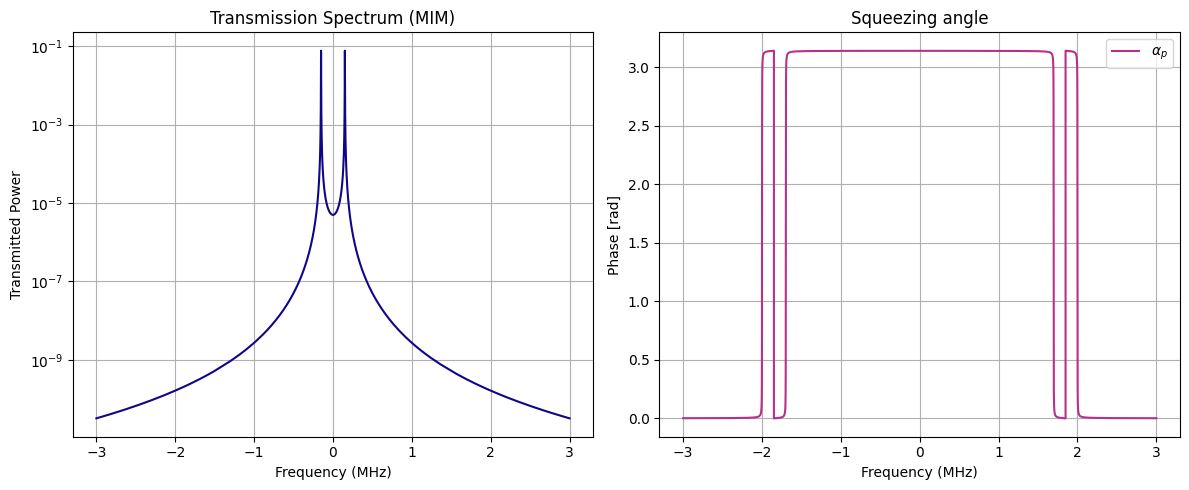

In [4]:
nu_range = np.linspace(-3e6, 3e6, 1000000) # 10k originally
detuning = -2e6  # Detuning value

# Compute transmission power spectrum
ranges, values, res_1, res_2 = cavity.transmitted_power([nu_range])
print(res_1, res_2)

# Compute folded spectrum
ranges_folded, values_folded = cavity.folded_spectrum_reflected([nu_range], detuning)

# Create subplots: Transmission power (left) and Folded spectrum (right)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].plot(ranges / (2*np.pi) * 1e-6, values, c =  "#100787")
axes[0].set_yscale("log")
axes[0].set_xlabel("Frequency (MHz)")
axes[0].set_ylabel("Transmitted Power")
axes[0].set_title("Transmission Spectrum (MIM)")
axes[0].grid()

axes[1].plot(ranges_folded / (2*np.pi) * 1e-6, values_folded, c="#b7308a", label=r"$\alpha_p$")
axes[1].set_xlabel("Frequency (MHz)")
axes[1].set_ylabel("Phase [rad]")
axes[1].set_title("Squeezing angle")
axes[1].legend()
axes[1].grid()
# axes[1].set_xlim(1.9, 2.1)  


# Adjust layout and show
plt.tight_layout()
# plt.savefig("transmission_and_phase_MIM.svg", transparent=True, dpi=300)
plt.show()

# fit - multiple config can be ok

In [35]:
t1, t2, t3 = symbols("t1 t2 t3")

L, delta, omega, L1, L2, delta1, delta2 = symbols("L delta omega L1 L2 delta1 delta2")

dL = 800e-6
subs_dict = [{L: L1, delta: delta1}, {L: L2, delta: delta2}]
subs_dict_num = {L1: 1-dL, delta1:0, L2:dL, delta2: 0}
mirror_ts = [t1, t2, t3]
lambdify_vars = [omega]
# mirror_vals = {t1: 0.1, t2: 0.1, t3: 0.1}
mirror_vals = {t1: 5000e-6, t2: 50e-6, t3: 1e-6}
# 10 ppm
cavity_sym = Cavity_sym(mirror_ts, subs_dict)

cavity = Cavity_num(mirror_ts, mirror_vals, subs_dict, subs_dict_num, lambdify_vars)

37417007.22209556 -37417109.00979933


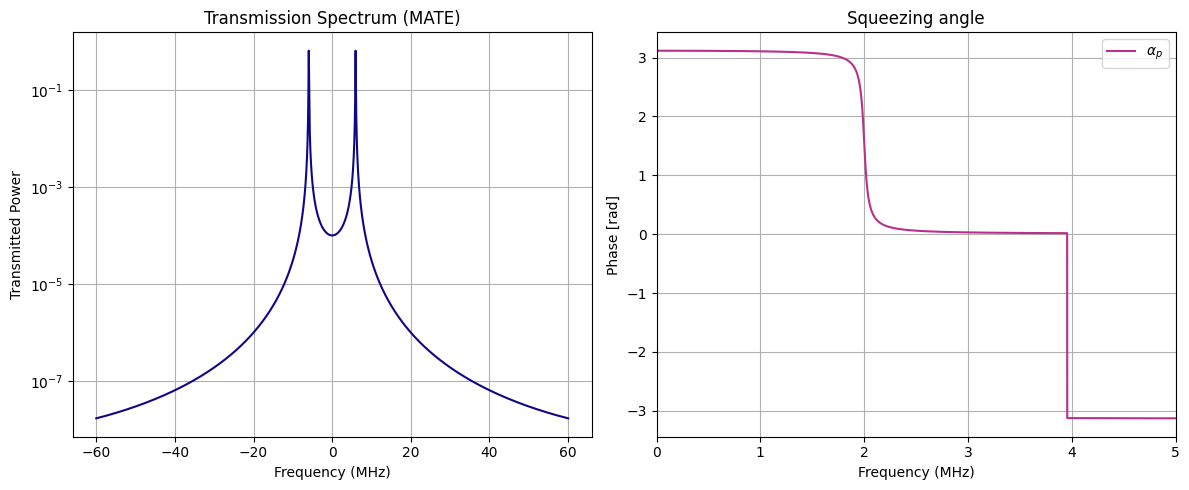

In [36]:
nu_range_1 = np.linspace(-60e6, 1.9e6, 1000000)
nu_range_2 = np.linspace(1.9e6, 2.1e6, 10000)
nu_range_3 = np.linspace(2.1e6, 60e6, 1000000)
nu_range = np.concatenate((nu_range_1, nu_range_2, nu_range_3))
# nu_range = np.linspace(-10e6, 10e6, 100000)
detuning = -2e6  # Detuning value

# Compute transmission power spectrum
ranges, values, res_1, res_2 = cavity.transmitted_power([nu_range])
print(res_1, res_2)

# Compute folded spectrum
ranges_folded, values_folded = cavity.folded_spectrum_reflected([nu_range], detuning)

# Create subplots: Transmission power (left) and Folded spectrum (right)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].plot(ranges / (2*np.pi) * 1e-6, values, c =  "#100787")
axes[0].set_yscale("log")
axes[0].set_xlabel("Frequency (MHz)")
axes[0].set_ylabel("Transmitted Power")
axes[0].set_title("Transmission Spectrum (MATE)")
axes[0].grid()

axes[1].plot(ranges_folded / (2*np.pi) * 1e-6, values_folded, c="#b7308a", label=r"$\alpha_p$")
axes[1].set_xlabel("Frequency (MHz)")
axes[1].set_ylabel("Phase [rad]")
axes[1].set_title("Squeezing angle")
axes[1].legend()
axes[1].grid()
axes[1].set_xlim(0, 5)  
# axes[1].set_ylim(-0.2, 3.4)


# Adjust layout and show
plt.tight_layout()
# plt.savefig("transmission_and_phase_MATE.svg", transparent=True, dpi=300)
plt.show()

# at what t1 and t2 the crossover happens and what is the equivalent finess
# check for mim

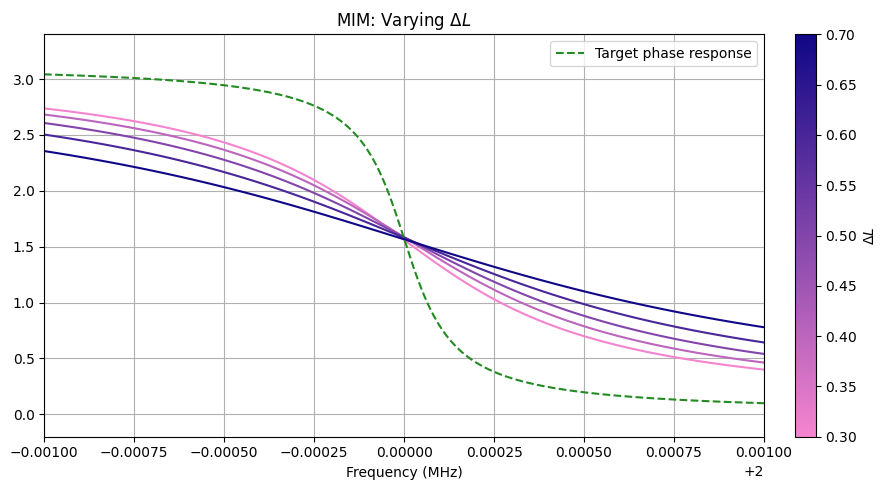

In [226]:
# Custom colormap
custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", ["#f584cf", "#100787"])

# Parameter sweeps
detuning_values = np.linspace(-30e6, 30e6, 5)
dL_values = np.linspace(0.3, 0.7, 5)
t2_values = np.linspace(10e-6, 1000e-6, 5)

# Fixed values
dL_fixed = 0.5
t1_fixed = 50e-6
t2_fixed = 50e-6
t3_fixed = 2e-6
detuning_fixed = -2e6

nu_range = np.linspace(-10e6, 10e6, 1000000)

fig, axes = plt.subplots(1, 1, figsize=(9, 5), sharey=True)
titles = ["Varying Detuning", r"MIM: Varying $\Delta L$", "Varying $t_2$"]

# --- First Plot: Varying dL ---
norm_dL = mcolors.Normalize(vmin=dL_values.min(), vmax=dL_values.max())
colors_dL = custom_cmap(np.linspace(0, 1, len(dL_values)))
sm_dL = cm.ScalarMappable(cmap=custom_cmap, norm=norm_dL)

for idx, dL in enumerate(dL_values):
    cavity = Cavity_num([t1_fixed, t2_fixed, t3_fixed],
                        {L1: 1 - dL, delta1: 0, L2: dL, delta2: 0},
                        subs_dict,
                        {L1: 1 - dL, delta1: 0, L2: dL, delta2: 0},
                        [omega])

    ranges_folded, values_folded = cavity.folded_spectrum_reflected([nu_range], detuning_fixed)
    axes.plot(ranges_folded / (2 * np.pi) * 1e-6, values_folded, color=colors_dL[idx])

omegas, values, derivative = target_response(P, m, F, L, omega_m, Q, 1064e-9, freq_arr)

axes.plot(omegas/(2*np.pi) * 1e-6, values + np.pi, linestyle = "dashed", label = "Target phase response", c = "forestgreen")

axes.set_xlabel("Frequency (MHz)")
axes.set_title(titles[1])
axes.grid()
axes.set_xlim(1.999, 2.001)
axes.set_ylim([-0.2, 3.4])

# Add colorbar for dL
cbar_dL = fig.colorbar(sm_dL, ax=axes, orientation="vertical", fraction=0.046, pad=0.04)
cbar_dL.set_label(r"$\Delta L$")
cbar_dL.ax.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))

plt.legend()
plt.tight_layout()
plt.savefig("quadrature_rotation_diff_dl.svg", transparent=True, dpi=300)
plt.show()

# alpha = 0.1
# plot theoretical response for different  qs for theoretical response 10e9 to 10e3
# omega_m / kappaOM output in legend


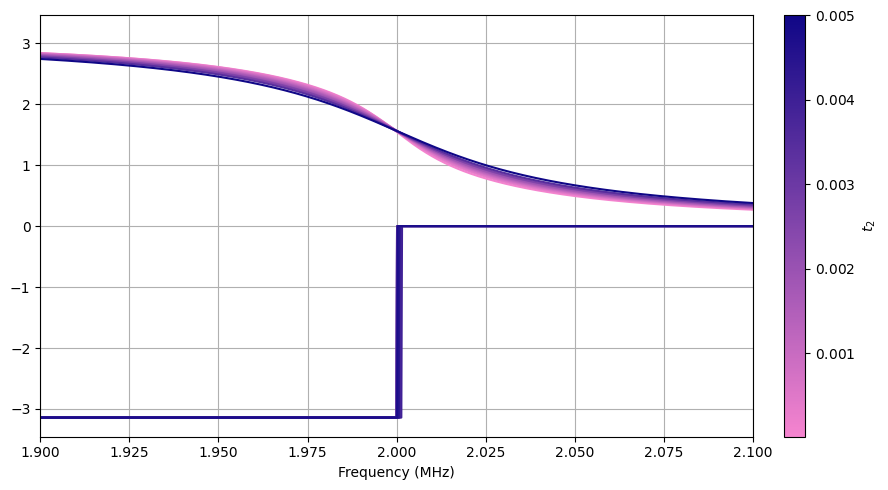

In [ ]:
custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", ["#f584cf", "#100787"])

# Parameter sweeps
dL_values = np.linspace(0.3, 0.7, 5)
t2_values = np.linspace(10e-6, 5000e-6, 20)

# Fixed values
dL_fixed = 800e-6
t1_fixed = 5000e-6
t2_fixed = 50e-6
t3_fixed = 2e-6
detuning_fixed = -2e6

nu_range = np.linspace(-100e6, 100e6, 1000000)

fig, axes = plt.subplots(1, 1, figsize=(9, 5), sharey=True)

norm_t2 = mcolors.Normalize(vmin=t2_values.min(), vmax=t2_values.max())
colors_t2 = custom_cmap(np.linspace(0, 1, len(t2_values)))
sm_t2 = cm.ScalarMappable(cmap=custom_cmap, norm=norm_t2)

for idx, t2 in enumerate(t2_values):
    cavity = Cavity_num([t1_fixed, t2, t3_fixed],
                        {L1: 1 - dL_fixed, delta1: 0, L2: dL_fixed, delta2: 0},
                        subs_dict,
                        {L1: 1 - dL_fixed, delta1: 0, L2: dL_fixed, delta2: 0},
                        [omega])

    ranges_folded, values_folded = cavity.folded_spectrum_reflected([nu_range], detuning_fixed)
    axes.plot(ranges_folded / (2 * np.pi) * 1e-6, values_folded, color=colors_t2[idx])

axes.set_xlabel("Frequency (MHz)")
# axes.set_title(titles[2])
axes.grid()
axes.set_xlim(1.9, 2.1)
# axes.set_ylim([-0.2, 3.4])

# Add colorbar for t2
cbar_dL = fig.colorbar(sm_t2, ax=axes, orientation="vertical", fraction=0.046, pad=0.04)
cbar_dL.set_label(r"$t_2$")
cbar_dL.ax.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))


plt.tight_layout()
plt.show()

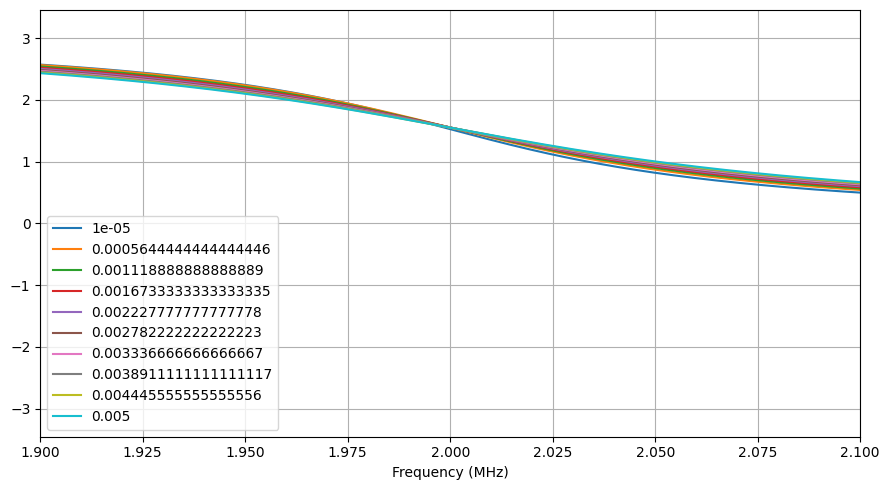

In [ ]:
# changing t2
dL_values = np.linspace(0.3, 0.7, 5)
t2_values = np.linspace(10e-6, 5000e-6, 10)

dL_fixed = 800e-6
t1_fixed = 10000e-6
t2_fixed = 50e-6
t3_fixed = 2e-6
detuning_fixed = -2e6

nu_range = np.linspace(-60e6, 60e6, 1000000)

fig, axes = plt.subplots(1, 1, figsize=(9, 5), sharey=True)

for idx, t2 in enumerate(t2_values):
    cavity = Cavity_num([t1_fixed, t2, t3_fixed],
                        {L1: 1 - dL_fixed, delta1: 0, L2: dL_fixed, delta2: 0},
                        subs_dict,
                        {L1: 1 - dL_fixed, delta1: 0, L2: dL_fixed, delta2: 0},
                        [omega])

    ranges_folded, values_folded = cavity.folded_spectrum_reflected([nu_range], detuning_fixed)
    axes.plot(ranges_folded / (2 * np.pi) * 1e-6, values_folded, label = str(t2))

axes.set_xlabel("Frequency (MHz)")
# axes.set_title(titles[2])
axes.grid()
axes.set_xlim(1.9, 2.1)
# axes.set_ylim([-0.2, 3.4])

plt.legend()


plt.tight_layout()
plt.show()

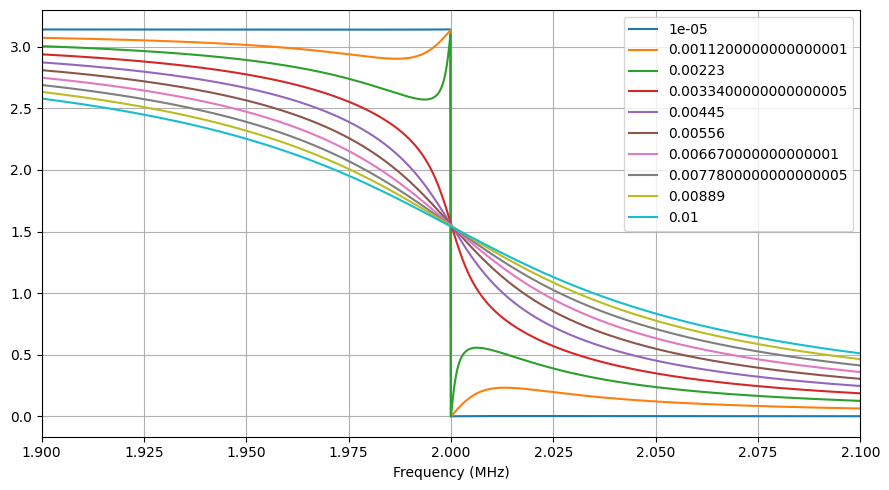

In [42]:
# changing t1

dL_values = np.linspace(0.3, 0.7, 5)
t2_values = np.linspace(10e-6, 10000e-6, 10)

dL_fixed = 800e-6
t1_fixed = 50e-6
t2_fixed = 50e-6
t3_fixed = 2e-6
detuning_fixed = -2e6

nu_range = np.linspace(-60e6, 60e6, 1000000)

fig, axes = plt.subplots(1, 1, figsize=(9, 5), sharey=True)

for idx, t2 in enumerate(t2_values):
    cavity = Cavity_num([t2, t1_fixed, t3_fixed],
                        {L1: 1 - dL_fixed, delta1: 0, L2: dL_fixed, delta2: 0},
                        subs_dict,
                        {L1: 1 - dL_fixed, delta1: 0, L2: dL_fixed, delta2: 0},
                        [omega])

    ranges_folded, values_folded = cavity.folded_spectrum_reflected([nu_range], detuning_fixed)
    axes.plot(ranges_folded / (2 * np.pi) * 1e-6, values_folded, label = str(t2))

axes.set_xlabel("Frequency (MHz)")
# axes.set_title(titles[2])
axes.grid()
axes.set_xlim(1.9, 2.1)
# axes.set_ylim([-0.2, 3.4])

plt.legend()


plt.tight_layout()
plt.show()

In [ ]:
# changing t2

dL_values = np.linspace(0.3, 0.7, 5)
t2_values = np.linspace(10e-6, 1000e-6, 10)

dL_fixed = 0.5
t1_fixed = 20-6
t2_fixed = 50e-6
t3_fixed = 2e-6
detuning_fixed = -2e6

nu_range = np.linspace(-100e6, 100e6, 1000000)

fig, axes = plt.subplots(1, 1, figsize=(9, 5), sharey=True)

for idx, t2 in enumerate(t2_values):
    cavity = Cavity_num([t1_fixed, t2, t3_fixed],
                        {L1: 1 - dL_fixed, delta1: 0, L2: dL_fixed, delta2: 0},
                        subs_dict,
                        {L1: 1 - dL_fixed, delta1: 0, L2: dL_fixed, delta2: 0},
                        [omega])

    ranges_folded, values_folded = cavity.folded_spectrum_reflected([nu_range], detuning_fixed)
    axes.plot(ranges_folded / (2 * np.pi) * 1e-6, np.unwrap(values_folded, period = np.pi), label = str(t2))

axes.set_xlabel("Frequency (MHz)")
# axes.set_title(titles[2])
axes.grid()
axes.set_xlim(1.5, 2.5)
# axes.set_ylim([-0.2, 3.4])

plt.legend()


plt.tight_layout()
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_32876\2541983528.py:35: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
c:\Users\HP\anaconda3\envs\py38\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


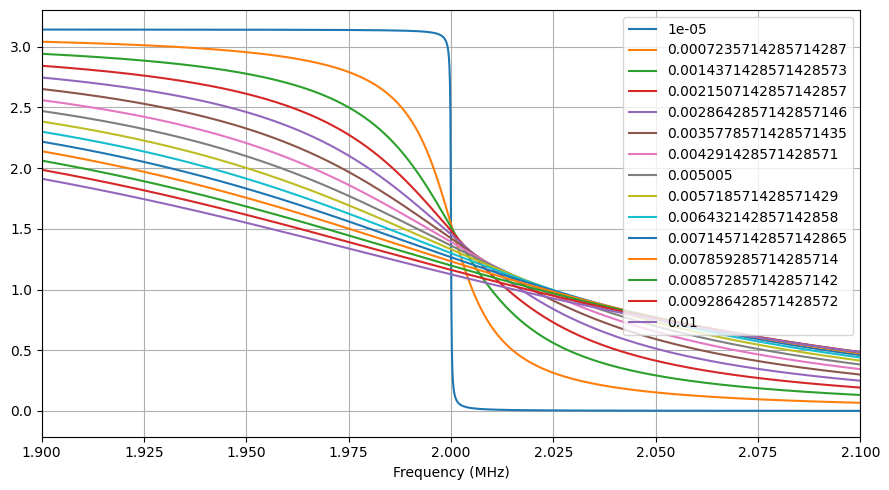

In [48]:
# changing t1

dL_values = np.linspace(0.3, 0.7, 5)
t2_values = np.linspace(10e-6, 10000e-6, 15)

dL_fixed = 0.5
t1_fixed = 50e-6
t2_fixed = 10e-6
t3_fixed = 2e-6
detuning_fixed = -2e6

nu_range = np.linspace(-60e6, 60e6, 1000000)

fig, axes = plt.subplots(1, 1, figsize=(9, 5), sharey=True)

for idx, t2 in enumerate(t2_values):
    cavity = Cavity_num([t2, t1_fixed, t3_fixed],
                        {L1: 1 - dL_fixed, delta1: 0, L2: dL_fixed, delta2: 0},
                        subs_dict,
                        {L1: 1 - dL_fixed, delta1: 0, L2: dL_fixed, delta2: 0},
                        [omega])

    ranges_folded, values_folded = cavity.folded_spectrum_reflected([nu_range], detuning_fixed)
    axes.plot(ranges_folded / (2 * np.pi) * 1e-6, values_folded, label = str(t2))

axes.set_xlabel("Frequency (MHz)")
# axes.set_title(titles[2])
axes.grid()
axes.set_xlim(1.9, 2.1)
# axes.set_ylim([-0.2, 3.4])

plt.legend()


plt.tight_layout()
plt.show()

In [50]:
def target_response(power, mass, finess, L, omega_m, Q, wavelength, freq_array):
    omega_laser = Symbol("Omega_laser")
    chi = Symbol("Chi")
    omega = Symbol('Omega')
    c = 3e8
    damping = omega_m / Q
    fsrOM = c/ (2 * L)
    kappaOM = fsrOM / finess
    omega_arr = 2 * np.pi * freq_array

    chi = (mass * (omega_m ** 2 - omega ** 2 + 1j * damping * omega)) ** (-1)
    omega_laser = 2 * np.pi * c / wavelength

    K = sp.atan((16 * omega_laser * power) / (c * L * kappaOM) * chi)
    K_diff = sp.diff(K, omega)
    K_func = sp.lambdify(omega, K)
    values = K_func(omega_arr)

    K_diff_func = sp.lambdify(omega, K_diff)

    values = K_func(omega_arr)
    derivatives = K_diff_func(omega_arr) 

    return omega_arr, np.angle(values), derivatives

In [51]:
P = 1e-3
m = 10e-9
F = 1000
Q = 10e3
L = 1e-3
omega_m = 2e6 * 2 * np.pi
freq_arr = np.linspace(-10e6, 10e6, 10000000)

In [52]:
omegas, values, derivative = target_response(P, m, F, L, omega_m, Q, 1064e-9, freq_arr)
plt.plog(omegas/(2*np.pi) * 1e-6, values) 

plt.xlim([1.99, 2.01])
# plt.ylim([-0.3, 3.5])

AttributeError: module 'matplotlib.pyplot' has no attribute 'plog'

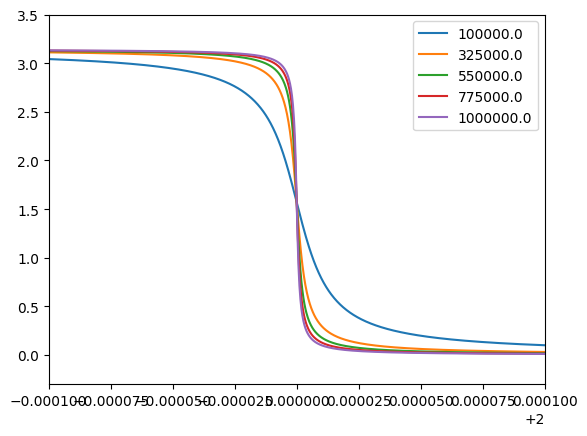

In [8]:
Q_factors = np.linspace(10e4, 10e5, 5)
freq_arr = np.linspace(1.9e6, 2.1e6, 1000000)

for q in Q_factors:
    omegas, values, derivative = target_response(P, m, F, L, omega_m, q, 1064e-9, freq_arr)
    plt.plot(omegas/(2*np.pi) * 1e-6, values + np.pi, label = str(q)) 
    plt.xlim([1.9999, 2.0001])
    plt.ylim([-0.3, 3.5])

plt.legend()

In [11]:
t1, t2, t3 = symbols("t1 t2 t3")

L, delta, omega, L1, L2, delta1, delta2 = symbols("L delta omega L1 L2 delta1 delta2")


subs_dict = [{L: L1, delta: delta1}, {L: L2, delta: delta2}]
mirror_ts = [t1, t2, t3]
lambdify_vars = [omega]
detuning = -2e6

def fit_func(freq_array, dL, t2_sub, dl1, dl2):
    subs_dict_num = {L1: 1-dL, delta1: dl1, L2: dL, delta2: dl2}
    mirror_vals = {t1: 50e-6, t2: t2_sub, t3: 1e-6}
    cavity = Cavity_num(mirror_ts, mirror_vals, subs_dict, subs_dict_num, lambdify_vars)
    ranges_folded, values_folded = cavity.folded_spectrum_reflected([freq_array], detuning)
    return np.array(values_folded)

In [105]:
initial_guess = [0.5, 100e-6, 0, 0]
lower_bounds = [200e-6, 10e-6, 0, 0]
upper_bounds = [0.5, 1, 100e-9, 100e-9]
freq_arr = np.linspace(-20e6, 20e6, 10000000)
target_vals = values + np.pi

opt_params, _ = curve_fit(fit_func, freq_arr, target_vals, p0=initial_guess, bounds=(lower_bounds, upper_bounds))

fitted_dL, fitted_t2, dl1, dl2 = opt_params

In [106]:
print(fitted_dL)
print(fitted_t2)
print(dl1)
print(dl2)

0.4999999999
0.0001
1e-10
1e-10


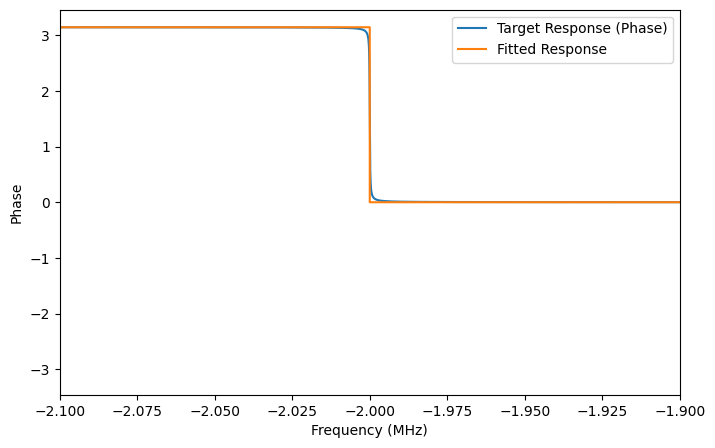

In [122]:
plt.figure(figsize=(8, 5))
plt.plot(omegas/(2*np.pi) * 1e-6, values, label="Target Response (Phase)")
plt.plot(freq_arr*1e-6, fit_func(freq_arr, fitted_dL, fitted_t2, -dl1, dl2), label=f"Fitted Response")
plt.xlabel("Frequency (MHz)")
plt.ylabel("Phase")
plt.legend()
plt.xlim([-2.1, -1.9])
plt.show()

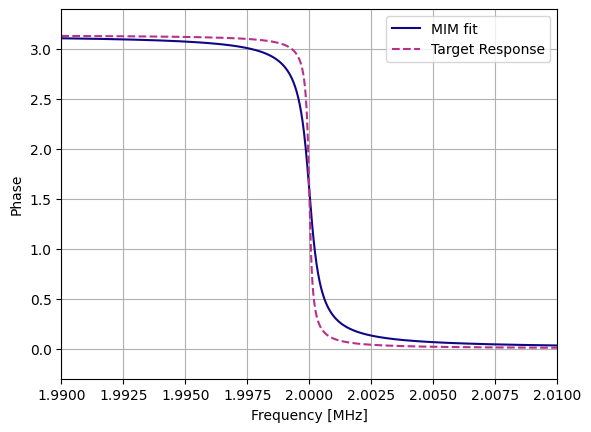

In [ ]:
t1, t2, t3 = symbols("t1 t2 t3")

target_vals = values + np.pi
L, delta, omega, L1, L2, delta1, delta2 = symbols("L delta omega L1 L2 delta1 delta2")
subs_dict = [{L: L1, delta: delta1}, {L: L2, delta: delta2}]
mirror_ts = [t1, t2, t3]
lambdify_vars = [omega]
nu_range = np.linspace(-10e6, 10e6, 1000000)
dL = 0.1
subs_dict_num = {L1: 1-dL, delta1: -1e-10, L2: dL, delta2: 1e-10}
cavity = Cavity_num(mirror_ts, {t1: 50e-6, t2: 0.0001, t3: 1e-6}, subs_dict, subs_dict_num, lambdify_vars)
# ranges, values, res_1, res_2 = cavity.transmitted_power([nu_range])
ranges_folded, values_folded = cavity.folded_spectrum_reflected([nu_range], detuning)
plt.plot(ranges_folded / (2 * np.pi) * 1e-6, values_folded, c = "#100787", label = "MIM fit")
plt.plot(omegas/(2*np.pi) * 1e-6, target_vals, label="Target Response", c = "#b7308a", linestyle = "dashed")
plt.xlim([1.99, 2.01])
plt.ylim([-0.3, 3.4])
plt.legend()
plt.grid()
plt.xlabel("Frequency [MHz]")
plt.ylabel("Phase")
# plt.savefig("fit_vs_target_MIM.svg", transparent=True, dpi=300)
plt.show()

# plt.yscale("log")

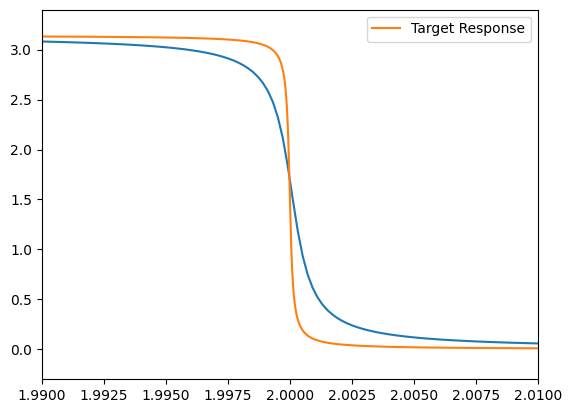

In [167]:
t1, t2, t3 = symbols("t1 t2 t3")

L, delta, omega, L1, L2, delta1, delta2 = symbols("L delta omega L1 L2 delta1 delta2")
subs_dict = [{L: L1, delta: delta1}, {L: L2, delta: delta2}]
mirror_ts = [t1, t2, t3]
lambdify_vars = [omega]
nu_range = np.linspace(-10e6, 10e6, 100000)
dL = 0.4999999999
subs_dict_num = {L1: 1-dL, delta1: -1e-10, L2: dL, delta2: 1e-10}
cavity = Cavity_num(mirror_ts, {t1: 50e-6, t2: 50e-6, t3: 1e-6}, subs_dict, subs_dict_num, lambdify_vars)
ranges, values, res_1, res_2 = cavity.transmitted_power([nu_range])
ranges_folded, values_folded = cavity.folded_spectrum_reflected([nu_range], detuning)
plt.plot(ranges_folded / (2 * np.pi) * 1e-6, values_folded)
plt.plot(omegas/(2*np.pi) * 1e-6, target_vals, label="Target Response")
plt.xlim([1.99, 2.01])
plt.ylim([-0.3, 3.4])
plt.legend()
plt.show()
# plt.yscale("log")